#### 1.1 Analytical Comparison with Integration for Incoming Fee

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.read_csv('comprehensive_comparison_results.csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


sigma = 0.2
gamma = 0.003
relative_p = 0.5
x = 100
filter_df = results_df[
    (results_df['sigma'] == sigma) &
    (results_df['gamma'] == gamma) &
    (results_df['relative_p'] == relative_p) &
    (results_df['x'] == x)
    ].copy()  # Create an explicit copy

filter_df.loc[:, 'absolute_incoming_profit'] = filter_df['analytical_incoming_fee'] + \
                                        filter_df['analytical_pool_value'] - \
                                            filter_df['current_pool_value']
filter_df.loc[:, 'absolute_outgoing_profit'] = filter_df['analytical_outgoing_fee'] + \
                                        filter_df['analytical_pool_value'] - \
                                            filter_df['current_pool_value']
plt.figure(figsize=(12, 8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.plot(filter_df['drift'],
         filter_df['absolute_incoming_profit'], label='Analytical Incoming Fee')
ax1.plot(filter_df['drift'],
         filter_df['absolute_outgoing_profit'], label='Analytical Outgoing Fee')
ax1.axhline(y=0, color='black', linestyle='--')
ax1.legend()

ax2.plot(filter_df['drift'],
         filter_df['absolute_outgoing_profit'] - filter_df['absolute_incoming_profit'], label='Fee difference')
ax2.legend()


plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


sigma = 0.2
gamma = 0.003
relative_p = 0.5
x = 100
filter_df = results_df[
    (results_df['sigma'] == sigma) &
    (results_df['gamma'] == gamma) &
    (results_df['relative_p'] == relative_p) &
    (results_df['x'] == x)
    ].copy()  # Create an explicit copy

filter_df.loc[:, 'absolute_incoming_profit'] = filter_df['analytical_incoming_fee'] + \
                                        filter_df['analytical_pool_value'] - \
                                            filter_df['current_pool_value']
filter_df.loc[:, 'absolute_outgoing_profit'] = filter_df['analytical_outgoing_fee'] + \
                                        filter_df['analytical_pool_value'] - \
                                            filter_df['current_pool_value']
plt.figure(figsize=(12, 8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.plot(filter_df['drift'],
         filter_df['accounting_profit_incoming'], label='Analytical Incoming Fee')
ax1.plot(filter_df['drift'],
         filter_df['accounting_profit_outgoing'], label='Analytical Outgoing Fee')
ax1.axhline(y=0, color='black', linestyle='--')
ax1.legend()

ax2.plot(filter_df['drift'],
         filter_df['accounting_profit_outgoing'] - filter_df['accounting_profit_incoming'], label='Fee difference')
ax2.legend()


plt.show()



In [ ]:
print(results_df.columns)

# Parameters

Parameters are defined as follows:

- $x$: Trading variable ranging from 10 to 200, with a constant $L$ (liquidity) of 100
- $\gamma$: Fee rate parameter for the AMM
- relative_p: A float in [0,1] that determines the initial price position within the AMM spread:
  - relative_p = 0: Initial price is at AMM bid
  - relative_p = 0.5: Initial price is at midpoint
  - relative_p = 1: Initial price is at AMM ask
- drift and $\sigma$: Parameters for the Geometric Brownian Motion (GBM) that the price follows


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_profit_comparison(df, x_column, fixed_params=None):
    """
    Create a 1x2 plot comparing incoming and outgoing profits
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe containing the results
    x_column : str
        The column to use for x-axis
    fixed_params : dict, optional
        Dictionary of parameters to filter the dataframe by
    """
    if fixed_params:
        for param, value in fixed_params.items():
            df = df[df[param] == value]
    
    # Create figure with 1x2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left plot: Incoming and Outgoing profits
    if x_column == 'gamma':
        ax1.plot(df[x_column], df['accounting_profit_incoming'], 
                 label='Incoming', marker='o', markersize=3)  # s
        ax1.plot(df[x_column], df['accounting_profit_outgoing'], 
                 label='Outgoing', marker='o', markersize=3)  # s
    else:
        ax1.plot(df[x_column], df['accounting_profit_incoming'], 
                 label='Incoming', marker='o')
        ax1.plot(df[x_column], df['accounting_profit_outgoing'], 
                 label='Outgoing', marker='s')
        
    ax1.set_xlabel(x_column)
    ax1.set_ylabel('Accounting Profit')
    ax1.set_title(f'Incoming vs Outgoing Profits for different {x_column}')
    ax1.legend()
    ax1.grid(True)
    
    # Right plot: Difference between outgoing and incoming
    difference = df['accounting_profit_outgoing'] - df['accounting_profit_incoming']
    if x_column == 'gamma':
        ax2.plot(df[x_column], difference, color='purple', marker='o', markersize=3)  # s
    else:
        ax2.plot(df[x_column], difference, color='purple', marker='o')
    ax2.set_xlabel(x_column)
    ax2.set_ylabel('Profit Difference (Outgoing - Incoming)')
    ax2.set_title('Profit Difference')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

results_df = pd.read_csv('comprehensive_comparison_results.csv')

# Plot against sigma with fixed other parameters
plot_profit_comparison(results_df, 'sigma', 
                      fixed_params={'gamma': 0.0003, 'relative_p': 0, 'x': 10, 'drift': 0.2})

# Plot against x with fixed other parameters
plot_profit_comparison(results_df, 'x', 
                      fixed_params={'gamma': 0.0003, 'relative_p': 0.5, 'sigma': 0.1, 'drift': 0.2})

# Plot against gamma with fixed other parameters
plot_profit_comparison(results_df, 'gamma', 
                      fixed_params={'x': 10, 'relative_p': 0, 'sigma': 0.1, 'drift': 0.2})

# Plot against relative_p with fixed other parameters
plot_profit_comparison(results_df, 'relative_p', 
                      fixed_params={'x': 10, 'sigma': 0.1, 'drift': 0.2, 'gamma': 0.0003})

# Plot against drift with fixed other parameters
plot_profit_comparison(results_df, 'drift', 
                      fixed_params={'x': 10, 'sigma': 0.1, 'gamma': 0.0003, 'relative_p': 0.5})



In [8]:
import pandas as pd

path = '/home/shiftpub/Dynamic_AMM/output/two_step_metrics.csv'


df = pd.read_csv(path)

print(df.columns)

Index(['metric', 'step', 'fee_rate', 'sigma', 'fee_source', 'value'], dtype='object')


In [9]:
# print unique metrics
print(df['metric'].unique())

df = df[df['metric'] == 'fee_revenue']

# sort by sigma and fee rate
df = df.sort_values(by=['sigma', 'fee_rate'])

print(df.head().to_markdown())




['fee_revenue' 'pool_value' 'arbitrageur_revenue' 'accounting_profit']
|      | metric      |   step |   fee_rate |   sigma | fee_source   |       value |
|-----:|:------------|-------:|-----------:|--------:|:-------------|------------:|
| 2560 | fee_revenue |      1 |     0.0005 |     0.2 | in           | 3.34119e-06 |
| 2561 | fee_revenue |      2 |     0.0005 |     0.2 | in           | 3.34897e-06 |
| 2720 | fee_revenue |      1 |     0.0005 |     0.2 | out          | 3.34533e-06 |
| 2721 | fee_revenue |      2 |     0.0005 |     0.2 | out          | 3.35318e-06 |
| 2568 | fee_revenue |      1 |     0.001  |     0.2 | in           | 4.74359e-06 |


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/home/shiftpub/Dynamic_AMM/fee_optimization_results.csv'

results_df = pd.read_csv(path)


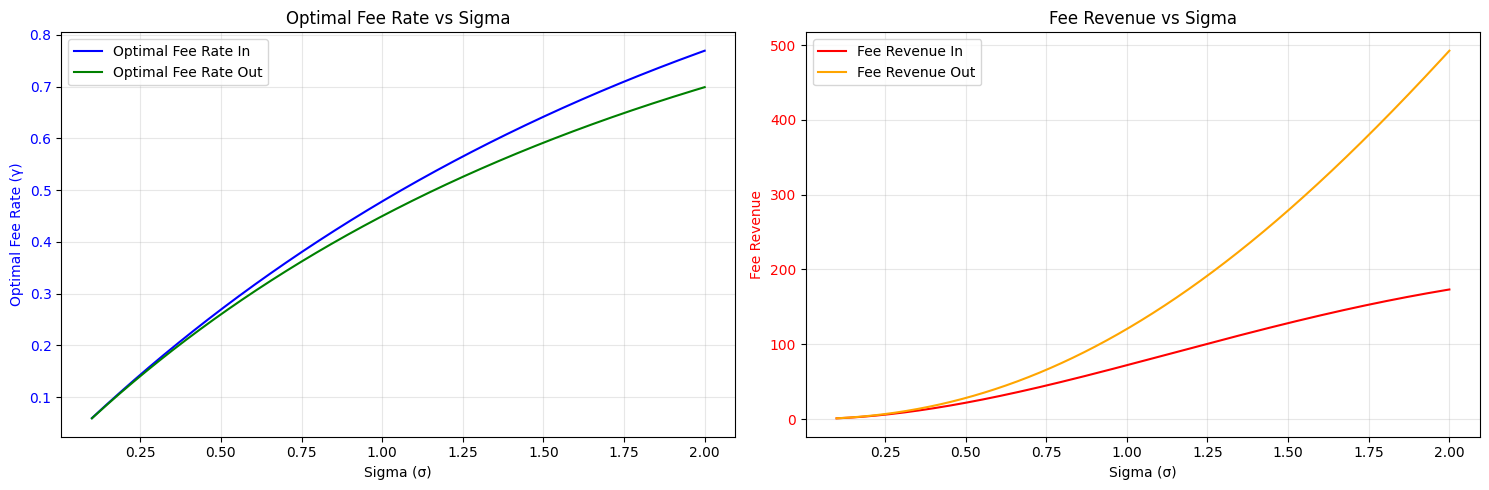

In [3]:

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Optimal Gamma
ax1.plot(results_df['sigma'], results_df['opt_gamma_in'], color='blue', label='Optimal Fee Rate In')
ax1.plot(results_df['sigma'], results_df['opt_gamma_out'], color='green', label='Optimal Fee Rate Out')
ax1.set_xlabel('Sigma (σ)')
ax1.set_ylabel('Optimal Fee Rate (γ)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Optimal Fee Rate vs Sigma')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Right plot: Fee Revenue
ax2.plot(results_df['sigma'], results_df['opt_fee_in'], color='red', label='Fee Revenue In')
ax2.plot(results_df['sigma'], results_df['opt_fee_out'], color='orange', label='Fee Revenue Out')
ax2.set_xlabel('Sigma (σ)')
ax2.set_ylabel('Fee Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_title('Fee Revenue vs Sigma')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('gamma_fee_plot.png', dpi=300, bbox_inches='tight')
plt.show()


|    |   s |   gamma |    x_re |   x_dis |    y_re |   y_dis |     x_fee |   reinvest_constant |   distribute_constant |   total_re |   total_dis |
|---:|----:|--------:|--------:|--------:|--------:|--------:|----------:|--------------------:|----------------------:|-----------:|------------:|
|  0 | 0.5 |  0.0001 | 1414.16 | 1414.14 | 707.152 | 707.142 | 0.0207092 |             1000.01 |                  1000 |    1414.23 |     1414.23 |
|  1 | 0.5 |  0.0002 | 1414.11 | 1414.07 | 707.198 | 707.178 | 0.0414155 |             1000.03 |                  1000 |    1414.25 |     1414.25 |
|  2 | 0.5 |  0.0003 | 1414.06 | 1414    | 707.244 | 707.213 | 0.0621188 |             1000.04 |                  1000 |    1414.28 |     1414.28 |
|  3 | 0.5 |  0.0004 | 1414.01 | 1413.93 | 707.29  | 707.248 | 0.0828193 |             1000.06 |                  1000 |    1414.3  |     1414.3  |
|  4 | 0.5 |  0.0005 | 1413.96 | 1413.86 | 707.335 | 707.284 | 0.103517  |             1000.07 |                

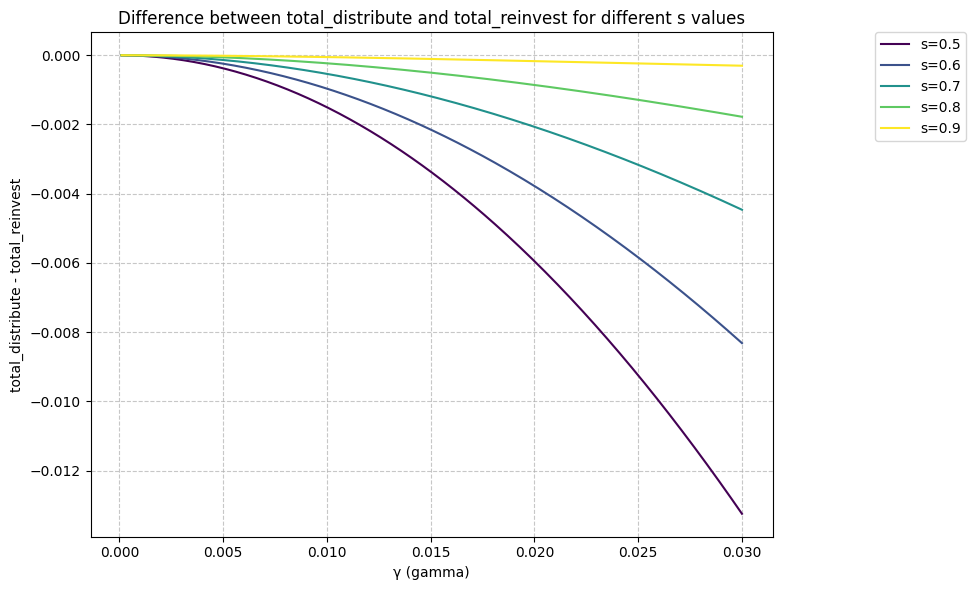

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import numpy as np

def x_reinvest_down(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    delta_x = (-(2-gamma)*x + np.sqrt(gamma**2 * x**2 + 4*L**2*(1-gamma)**2/s))/(2*(1-gamma))
    return x+delta_x

def y_reinvest_down(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    new_x = x_reinvest_down(gamma, s)
    new_y = new_x * s / (1-gamma)
    return new_y


def x_distribute_down(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    delta_x = 1/(1-gamma) * (L * np.sqrt((1-gamma)/s) - x)
    return s*delta_x*gamma, x+(1-gamma)*delta_x

def y_distribute_down(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    new_y = L*np.sqrt(s/(1-gamma))
    return new_y





# Create the DataFrame with the data
results = []
for s in [0.5, 0.6, 0.7, 0.8, 0.9]:
    for gamma in np.round(np.arange(0.0001, 0.0301, 0.0001), 4):
        x_re = x_reinvest_down(gamma, s)
        x_fee, x_dis = x_distribute_down(gamma, s)
        y_re = y_reinvest_down(gamma, s)
        y_dis = y_distribute_down(gamma, s)
        results.append({
            's': s,
            'gamma': gamma,
            'x_re': x_re,
            'x_dis': x_dis,
            'y_re': y_re,
            'y_dis': y_dis,
            'x_fee': x_fee,
            'reinvest_constant': np.sqrt(x_re * y_re),
            'distribute_constant': np.sqrt(x_dis * y_dis),
            'total_re': s*x_re + y_re,
            'total_dis': s*x_dis + y_dis + x_fee
        })

results_df = pd.DataFrame(results)
print(results_df.head().to_markdown())
# Get unique s values
s_values = sorted(results_df['s'].unique())

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(s_values)))

# Plot lines for each s value
for idx, s in enumerate(s_values):
    s_data = results_df[results_df['s'] == s]
    plt.plot(s_data['gamma'], 
             s_data['total_dis'] - s_data['total_re'],
             color=colors[idx],
             label=f's={s}')


# Customize the plot
plt.xlabel('γ (gamma)')
plt.ylabel('total_distribute - total_reinvest')
plt.title('Difference between total_distribute and total_reinvest for different s values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()

if price is going up, the delta_x in distribute case is less than that in the reinvest case

### Price goes up


|    |   s |   gamma |    x_re |   x_dis |    y_re |   y_dis |      y_fee |   reinvest_constant |   distribute_constant |   total_re |   total_dis |
|---:|----:|--------:|--------:|--------:|--------:|--------:|-----------:|--------------------:|----------------------:|-----------:|------------:|
|  0 | 1.2 |  0.0001 | 912.921 | 912.917 | 1095.4  | 1095.39 | 0.00953999 |             1000    |                  1000 |    2190.9  |     2190.9  |
|  1 | 1.2 |  0.0002 | 912.97  | 912.962 | 1095.35 | 1095.34 | 0.0190709  |             1000.01 |                  1000 |    2190.91 |     2190.91 |
|  2 | 1.2 |  0.0003 | 913.02  | 913.008 | 1095.3  | 1095.28 | 0.0285928  |             1000.01 |                  1000 |    2190.92 |     2190.92 |
|  3 | 1.2 |  0.0004 | 913.069 | 913.054 | 1095.25 | 1095.23 | 0.0381056  |             1000.02 |                  1000 |    2190.93 |     2190.93 |
|  4 | 1.2 |  0.0005 | 913.119 | 913.099 | 1095.2  | 1095.17 | 0.0476094  |             1000.02 |         

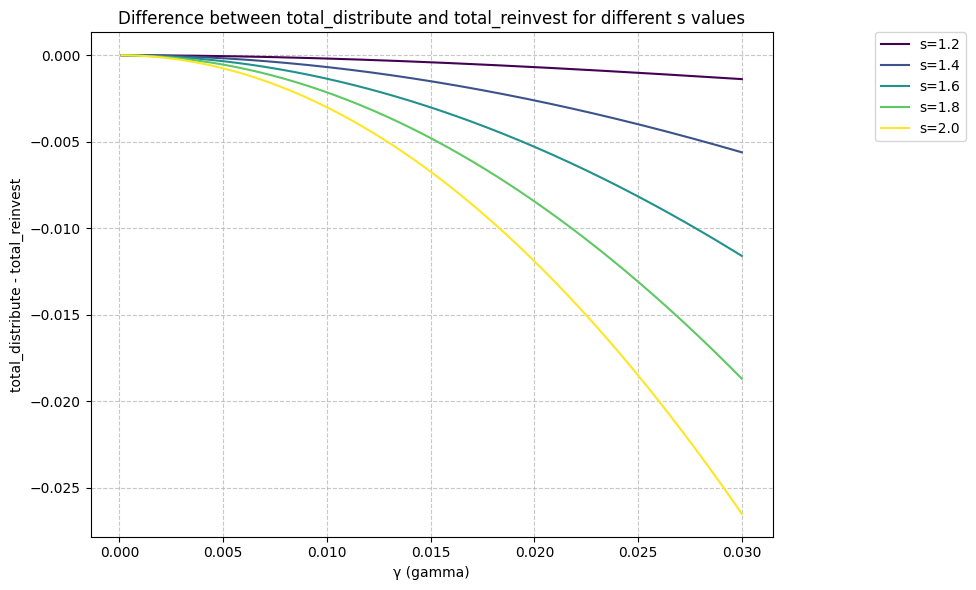

In [44]:
import numpy as np



def y_reinvest_up(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    delta_y = (-(2-gamma)*y + np.sqrt(gamma**2 * y**2 + 4*L**2*(1-gamma)**2*s))/(2*(1-gamma))
    return y+delta_y

def x_reinvest_up(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    new_y = y_reinvest_up(gamma, s)
    new_x = new_y / (s * (1-gamma)) 
    
    return new_x


def x_distribute_up(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    new_x = L / np.sqrt((1-gamma)*s)
    return new_x

def y_distribute_up(gamma, s):
    L= 1000
    x = 1000
    y = 1000
    
    delta_y = 1/(1-gamma) * (L * np.sqrt((1-gamma)*s) - y)
    return delta_y*gamma, y+(1-gamma)*delta_y
    

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the DataFrame with the data
results = []
for s in [1.2, 1.4, 1.6, 1.8, 2]:
    for gamma in np.round(np.arange(0.0001, 0.0301, 0.0001), 4):
        x_re = x_reinvest_up(gamma, s)
        x_dis = x_distribute_up(gamma, s)
        y_re = y_reinvest_up(gamma, s)
        y_fee, y_dis = y_distribute_up(gamma, s)
        results.append({
            's': s,
            'gamma': gamma,
            'x_re': x_re,
            'x_dis': x_dis,
            'y_re': y_re,
            'y_dis': y_dis,
            'y_fee': y_fee,
            'reinvest_constant': np.sqrt(x_re * y_re),
            'distribute_constant': np.sqrt(x_dis * y_dis),
            'total_re': s*x_re + y_re,
            'total_dis': s*x_dis + y_dis + y_fee
        })

results_df = pd.DataFrame(results)
print(results_df.head().to_markdown())
# Get unique s values
s_values = sorted(results_df['s'].unique())

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(s_values)))

# Plot lines for each s value
for idx, s in enumerate(s_values):
    s_data = results_df[results_df['s'] == s]
    plt.plot(s_data['gamma'], 
             s_data['total_dis'] - s_data['total_re'],
             color=colors[idx],
             label=f's={s}')


# Customize the plot
plt.xlabel('γ (gamma)')
plt.ylabel('total_distribute - total_reinvest')
plt.title('Difference between total_distribute and total_reinvest for different s values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()

